In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [100]:
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [102]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [103]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


/tmp/ipython-input-2427176082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target',data=df,palette='viridis' )


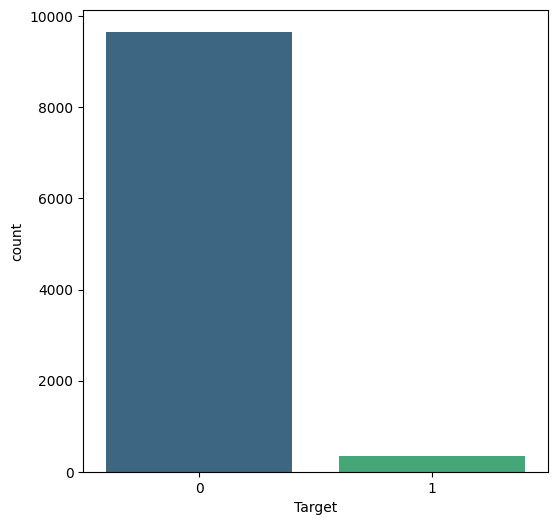

Target
0    97%
1     3%
Name: proportion, dtype: object


In [104]:
plt.figure(figsize=(6,6))
sns.countplot(x='Target',data=df,palette='viridis' )
plt.show()
print((df['Target'].value_counts(normalize=True).map("{:.0%}".format)))

/tmp/ipython-input-3487581913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Failure Type',data=df,palette='viridis')


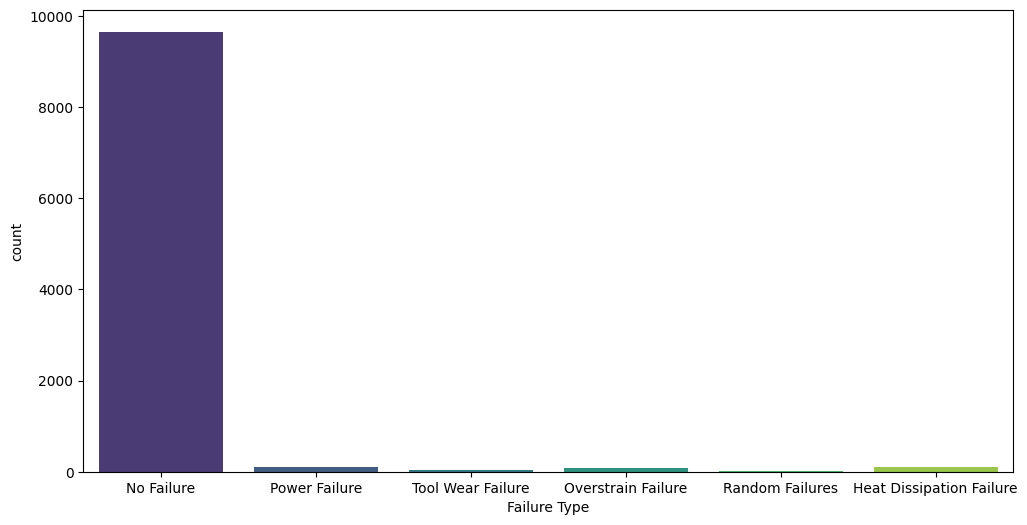

Failure Type
No Failure                  97%
Heat Dissipation Failure     1%
Power Failure                1%
Overstrain Failure           1%
Tool Wear Failure            0%
Random Failures              0%
Name: proportion, dtype: object


In [105]:
plt.figure(figsize=(12,6))
sns.countplot(x='Failure Type',data=df,palette='viridis')
plt.show()
print((df['Failure Type'].value_counts(normalize=True).map("{:.0%}".format)))


In [106]:
df['Temp_Diff'] = df['Air temperature [K]'] - df['Process temperature [K]']
df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temp_Diff,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,-10.5,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,-10.5,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,-10.4,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,-10.4,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,-10.5,56320.0


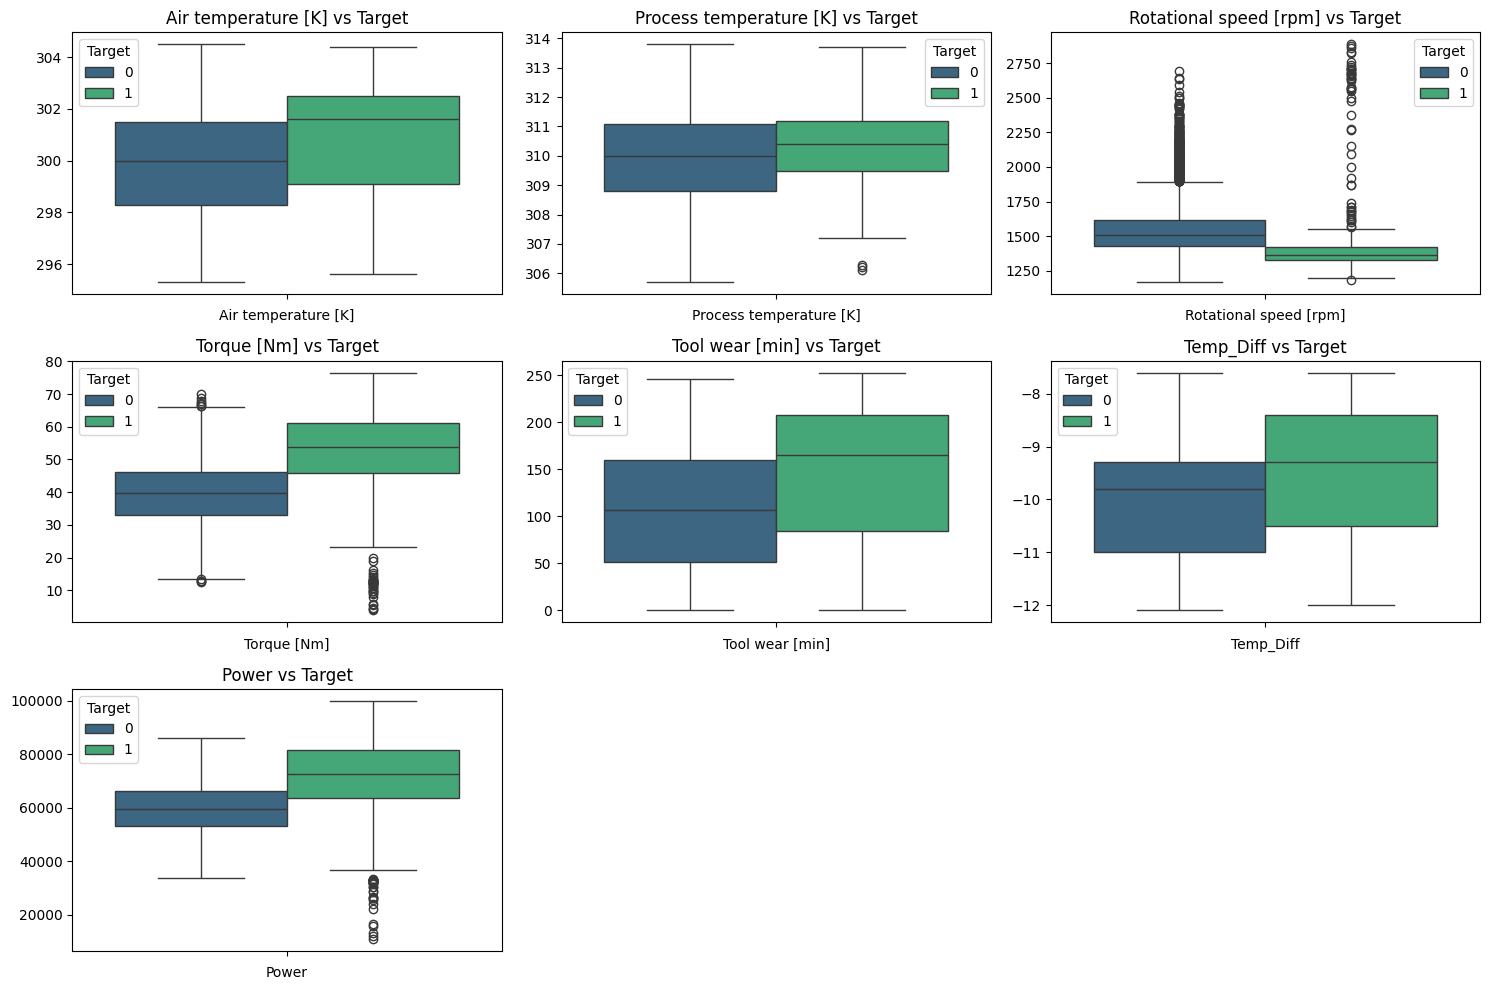

In [107]:
df=df.drop(['UDI','Product ID'],axis=1)
cols = df.drop('Target', axis=1).select_dtypes(include=np.number).columns
plt.figure(figsize =(15,10))

num_cols = len(cols)
n_rows = (num_cols + 2) // 3
n_cols = min(num_cols, 3)

for i, col in enumerate(cols, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.boxplot(data=df, y=col, hue='Target', palette='viridis')
  plt.title(f'{col} vs Target')
  plt.xlabel(col)
  plt.ylabel('')
plt.tight_layout()
plt.show()

In [108]:
df['Type'] = df['Type'].replace({'L':0,'M':1,'H':2})
df['Type']


/tmp/ipython-input-4043277316.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type'] = df['Type'].replace({'L':0,'M':1,'H':2})


,Type
0,1
1,0
2,0
3,0
4,0
...,...
9995,1
9996,2
9997,1
9998,2


In [109]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temp_Diff,Power
0,1,298.1,308.6,1551,42.8,0,0,No Failure,-10.5,66382.8
1,0,298.2,308.7,1408,46.3,3,0,No Failure,-10.5,65190.4
2,0,298.1,308.5,1498,49.4,5,0,No Failure,-10.4,74001.2
3,0,298.2,308.6,1433,39.5,7,0,No Failure,-10.4,56603.5
4,0,298.2,308.7,1408,40.0,9,0,No Failure,-10.5,56320.0


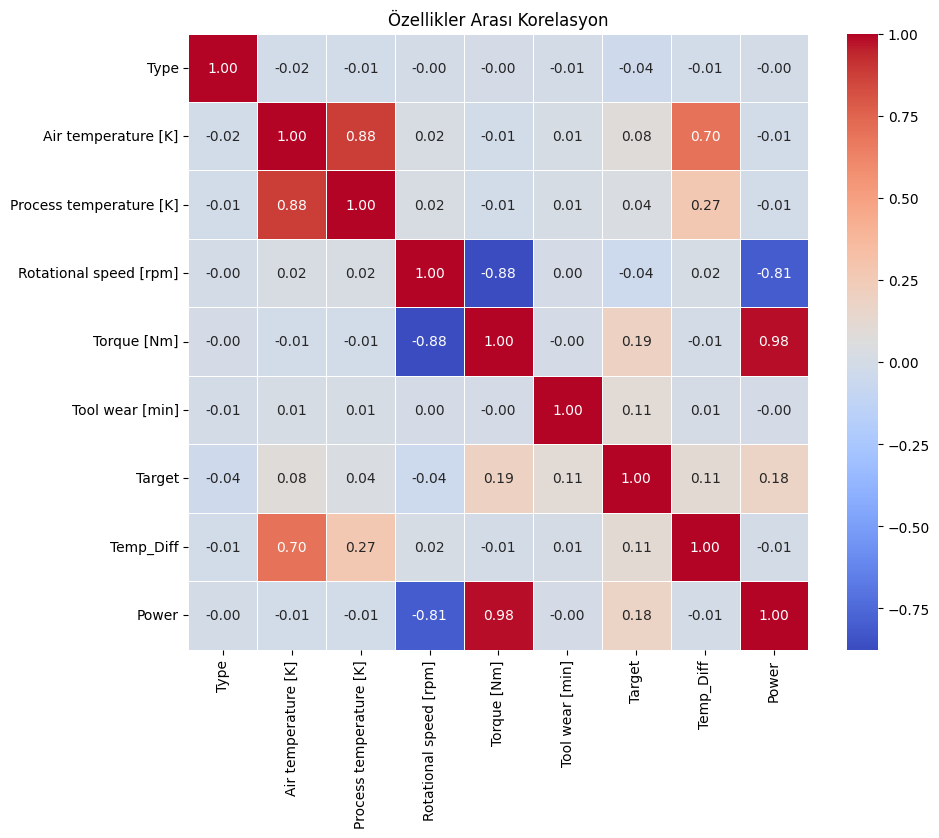

In [110]:
df=df.drop(['Failure Type'],axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Özellikler Arası Korelasyon')
plt.show()

KNN Modeli Genel Başarı: %97.60
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.88      0.34      0.49        68

    accuracy                           0.98      2000
   macro avg       0.93      0.67      0.74      2000
weighted avg       0.97      0.98      0.97      2000



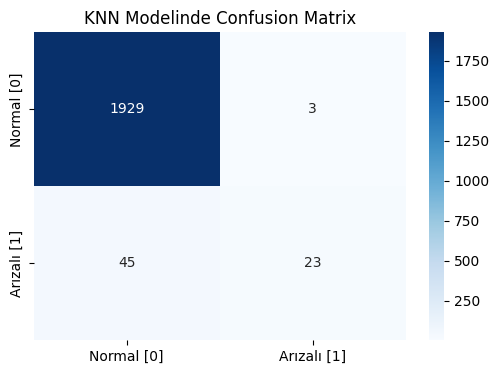

In [111]:
x= df.drop('Target',axis=1)
y=df['Target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)
y_pred=knn.predict(x_test_scaled)

print(f"KNN Modeli Genel Başarı: %{accuracy_score(y_test,y_pred)*100:.2f}")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal [0]','Arızalı [1]'],
            yticklabels=['Normal [0]','Arızalı [1]'])
plt.title('KNN Modelinde Confusion Matrix')
print("Sınıflandırma Raporu: \n",classification_report(y_test,y_pred))


Random Forest Modeli Genel Başarı: %98.75
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.94      0.68      0.79        68

    accuracy                           0.99      2000
   macro avg       0.96      0.84      0.89      2000
weighted avg       0.99      0.99      0.99      2000



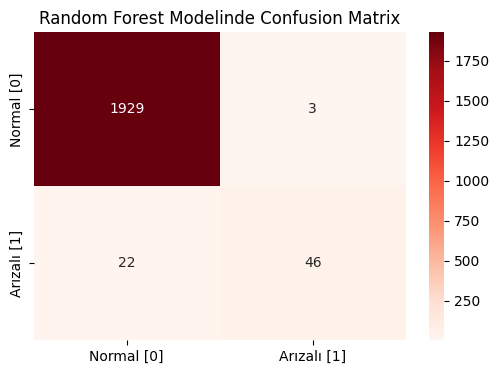

In [112]:
model = RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f"Random Forest Modeli Genel Başarı: %{accuracy_score(y_test,y_pred)*100:.2f}")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=['Normal [0]','Arızalı [1]'],
            yticklabels=['Normal [0]','Arızalı [1]'])
plt.title('Random Forest Modelinde Confusion Matrix')
print("Sınıflandırma Raporu: \n",classification_report(y_test,y_pred))


/tmp/ipython-input-3496076695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


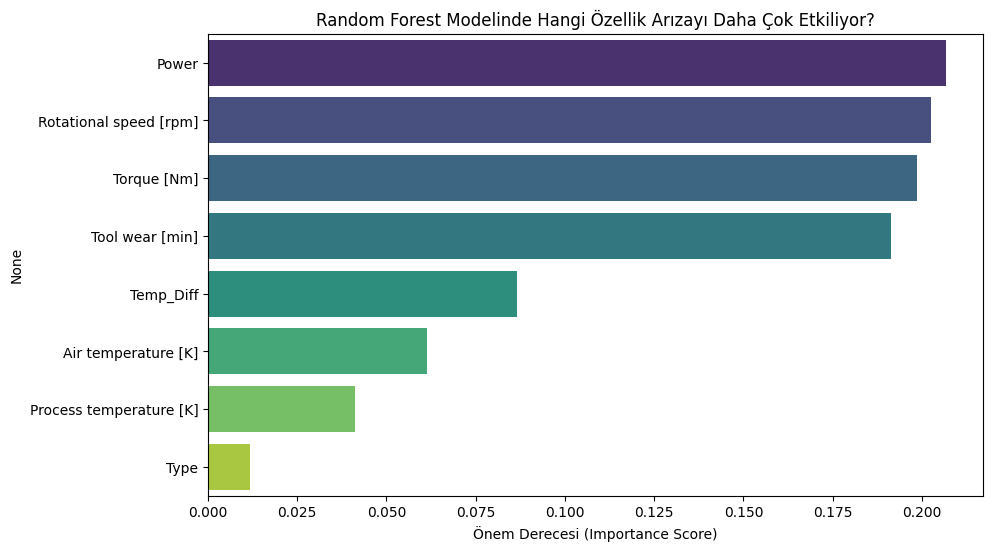

Power                      0.206801
Rotational speed [rpm]     0.202537
Torque [Nm]                0.198670
Tool wear [min]            0.191234
Temp_Diff                  0.086506
Air temperature [K]        0.061327
Process temperature [K]    0.041207
Type                       0.011718
dtype: float64


In [113]:
feature_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Random Forest Modelinde Hangi Özellik Arızayı Daha Çok Etkiliyor?')
plt.xlabel('Önem Derecesi (Importance Score)')
plt.show()

print(feature_importances)

Decision Tree Modeli Genel Başarı: %98.25
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.73      0.76      0.75        68

    accuracy                           0.98      2000
   macro avg       0.86      0.88      0.87      2000
weighted avg       0.98      0.98      0.98      2000



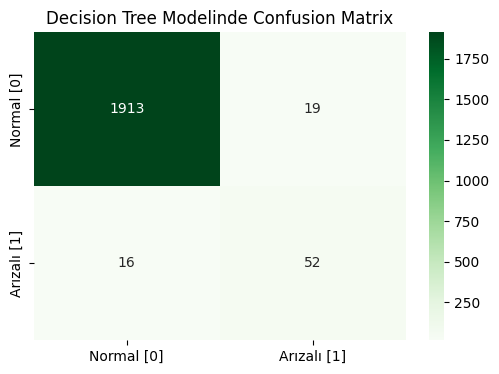

In [114]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

print(f"Decision Tree Modeli Genel Başarı: %{accuracy_score(y_test,y_pred)*100:.2f}")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal [0]','Arızalı [1]'],
            yticklabels=['Normal [0]','Arızalı [1]'])
plt.title('Decision Tree Modelinde Confusion Matrix')
print("Sınıflandırma Raporu: \n",classification_report(y_test,y_pred))

/tmp/ipython-input-683427205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


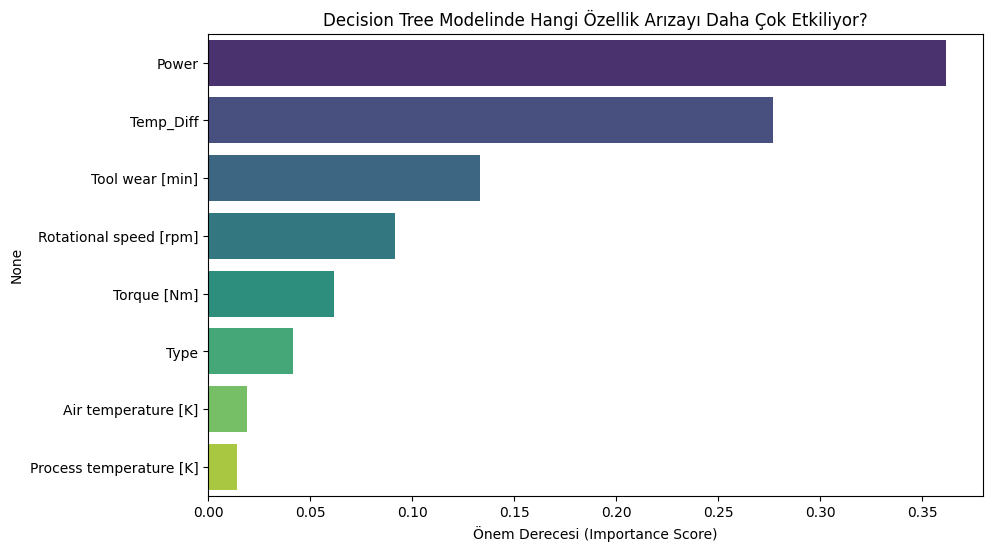

Power                      0.361630
Temp_Diff                  0.276688
Tool wear [min]            0.133059
Rotational speed [rpm]     0.091602
Torque [Nm]                0.061755
Type                       0.041594
Air temperature [K]        0.019260
Process temperature [K]    0.014412
dtype: float64


In [115]:
feature_importances = pd.Series(tree_model.feature_importances_, index=x_train.columns)

feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Decision Tree Modelinde Hangi Özellik Arızayı Daha Çok Etkiliyor?')
plt.xlabel('Önem Derecesi (Importance Score)')
plt.show()

print(feature_importances)